# Preprocessing of Data

Purchses file:

. Pre processed the Purchases file as our observation period is from June-August, but it has purchases from June-December
I have observed that the September-December purchases(2200) are comparitively less than that of June-August(5500).

. Number of unique users who purchased any item during June-August is around 2100. So, less than 4% users actually buy inapp purchases. This has gone down to 80 (0.15%) from Sep-Dec.

. Out of 58,842 around 58,831 users actually played the game atleast once from June-August (from Sessions File).

. The Long term value is the is how much revenue we estimate that the user will generate over his/her lifetime playing our game.

. Observation period is from June-August

. The inapp purchases ranges from 3.5 to 70.

. From the Purchases file I have calculated the Date of First Purchase, Date of Last Purchase and the differnce between these 2 dates, Total number of purchases made by a customer and his Long Term Revenue 

. This data is really helpful because marketing people can know whether the users are interested in their game or not

. All the variables like total purchases made, purchase duration and our predictor variable are Right skewed. So, we need to classify customers into High spending customers and low spending customers based on a threshold. By trial and error method I kept that threshold as 750.

Sessions file:

. From the Sessions file we got around 0.5 million observations which is a very good number as the maximum number it can reach  is 
. 58,842(users)*91(days) = 0.535 million. So, almost all users are returning to play our game atleast one time a day during June-August.

. I have created two variables namely total_sessions_played(Sum of all sessions played by an user) and Highest_Level_reached(Highest level reached by an user) during June-August.

. We can classify the users as "Rookie" who are present at Right Bottom as these users played many 
sessions but did not make it to the higher levels.[total_sessions_played > 1750 and Highest_Level_reached < 50]

. "Pro_Gamers" who played less sessions and made it to the higher levels [Highest_Level_reached > 25 and total_sessions_played < 250]

. The rest of the users are categorized as "Normal_Gamers"

Users file:

From the users file we can say that all the 58,842 users installed the game in the First Week of June.

Miscellaneous:

. Joined these three data frames by taking unique id as udid of a customer

. Saved the dataframe into a csv file as a backup as our preprocessing stage is done and we just need to model our data.

# Modelling of data:

. We can go for Logaritmic models but it is hard to understand those interactions instead I have classified the customers on their spending habits and Gaming level. This can be useful to Marketing people as they can target their adds to incite the customers based on these classifications.

. We can say that the Long Term value is in Positive linear relation with all other attributes but some are strongly correlated and some are not as we know that correlation is not a causation.

. From the correlation heat map We can keep a threshold for eliminating the redundant features for building a linear regression model.

. Otherwise we can go for Feature selection Backward elimination technique of Linear regression 
by keeping a threshold of confidence level to find out the most important features of this model.

. Tried different models like:
Linear Regression Ordinary Least Squares model
Lasso Regression with penalization factor of 130(experimented with different values)
As there is less amount of data going for deep learning model is not correct


. We can do the cross validation and grid search for tuning the hyperparameter like alpha of Lasso for getting good accuracy. But that kind of overfit the model.

. So, we need to fit different regression models for different segment (Low spending Customers and High spending customers) otherwise logarithmic model will also do a good job but things get complicated when explaining the logaritmic values.

. we can say that there is an increase in longterm value (LTV) if the observation period is increased for low end customers but for high end customers it is staying still

. As expected the absolute error for a low spending customer is coming around 75(Long term Value < 700) and for high spending customers is coming around 857(1000< Long term Value < 16000).

In [489]:
dff.head()

,total_sessions_played,Highest_Level_reached,purchase_duration,playing_duration,total_purchases_made,gamer_level,Cust_Spend,Long term Value
0,501,48,63.0,84.0,12,Normal_Gamers,Low,682.5
1,826,42,18.0,92.0,2,Normal_Gamers,Low,17.5
2,242,30,1.0,52.0,1,Pro_Gamers,Low,3.5
3,82,13,1.0,17.0,1,Normal_Gamers,Low,3.5
4,7,4,1.0,11.0,1,Normal_Gamers,Low,3.5


# Question and Answers

1)   What is LTV (in $) of users in this game? What would you project LTV of these users to
be if they continued to play the game beyond the observation period?

In [495]:
dft1.loc[:,["udid","Long term Value"]].head()

,udid,Long term Value
0,0020f5c05795400bb2868009cf4b2080,682.5
1,002b934415cb4ae78579f3be87a6283d,17.5
2,004f2f923b8f47a6b9f91fa5c61095de,3.5
3,00776d802fef4a26b525aed437af4728,3.5
4,008808b510244c9b957adbf27dd8c748,3.5


We can say that there is an increase in longterm value (LTV) if the observation period is increased for low end customers but for high end customers it is staying still.

2) What are the key assumptions that you are making? What are the weaknesses of these
assumptions?

The main assumption is that we expect that our Long Term Value of a customer varies Linearly with our predictors for different 
categories of spending of customers. 

We assumed that the model for different gamer_levels is equal. 

We do not have enough information about the customer like Gender, age, Employment status and Education status. We consider that this is uniform among all sectors of people and the inapp purchase of each item varies from 3.5 to 70. So, if any customer buy a high cost inapp purchases the LTV value changes drastically with in first few days of observation period. This creates a bias towards the Linear model and the in actual the data might be a polynomially related. Also, this model did not taken all the above specified variables into account as each customer is unique in order to cover the varience of the model.

3) Why might it be important to have an estimate of a user's LTV?

It is important to classify the customers based on the LTV as it gives the marketing people on how much budget can be spent on which customers for placing the advertisements in social media.

Also, to improve the revenue model by optimizing the inapp purchase such that it will be a win-win situation for both the customers and the company.

4) How might the LTV of new users change as the game spends more time in the market?

For new users (means as they install the game after June 1st week) their LTV is somewhat lesser than that of the existing users as LTV is the cumulative sum of all purchases.

As the game spends more time in the market, the LTV of new users will increase but not as much as that of during the initial period of time. 

5) What additional data might you want to in order improve your estimates? How would you
use it?

Instead of just giving the daily_iaf_revenue we want the inapp purchase cost of each item and whether a customer has bought it or not. This will help us analyze to optimize the cost of it and help us in channelized marketing and we can learn a little bit more about that particular customer.

We also need Gender, age, educational level, whether the person is active in social media or not, employment status  and urban or rural person as this covers the more categories of customers and helps in explaining the variance in the model.

6) Would you want to estimate this model for different groups of users rather than using all
user data together for your estimate? If so, which groups of users would you want to
model separately?

I have just modeled the data differently on differnt type of customer spending level(2). But I have to do the same thing with both the gamer_level(3) and Cust_spend(2), a total of six different models. This will fit the linear regression for different types of customers with lesser Mean Square Error and more R2 value.

# Python code:

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import time

# Purchases file

In [371]:
dfp = pd.read_csv("Purchases.csv")

In [372]:
dfp.head()

,udid,date,daily_iap_rev,purchases_made
0,44080da2aaa54b95ae96327e3649b651,6/8/2015,3.5,1
1,6593f2ec3f6848afa1177198a7cf29b6,6/15/2015,14.0,1
2,7468b1857ea848b1aa6fece800193e52,7/13/2015,70.0,1
3,bf57de635791447eb630a998e8251a4a,8/25/2015,70.0,1
4,516a4481f08f4022ae98945281d5c00b,6/6/2015,3.5,1


In [373]:
dfp["date"] = pd.to_datetime(dfp["date"])

In [374]:
dfp.isnull().sum()

udid              0
date              0
daily_iap_rev     0
purchases_made    0
dtype: int64

So, we do not have any missing values in our Purchases file

In [376]:
dfp.shape# our original Purchases file has purchases ranges from June to December but our observation period is from 
#June-August. So, deleted around 2000 observations from September to December

(5604, 4)

In [54]:
print("The  range of number of purchases made by a customer in a day is " +
      "from {} to {}".format(dfp["purchases_made"].min(),dfp["purchases_made"].max()))
          
      

The  range of number of purchases made by a customer in a day is from 1 to 21


In [37]:
print("The  range of revenue from a customer in a day is " +
      "from {} to {}".format(dfp["daily_iap_rev"].min(),dfp["daily_iap_rev"].max()))
      

The  range of revenue from a customer in a day is from 3.5 to 1330.0


In [377]:
dfp["daily_iap_rev"].max()

1330.0

In [378]:
sns.set_style("darkgrid")

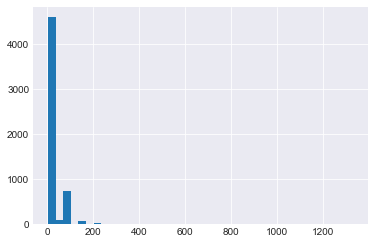

In [379]:

plt.hist(dfp["daily_iap_rev"], bins = 40, range = (dfp["daily_iap_rev"].min(), dfp["daily_iap_rev"].max()))
plt.show()

The distribution is right skewed it is better to go for Logarithmic transform but that makes our model complicated.

Let us check the price ranges of our in app purchases( maximum price of a purchase and minimum price of a purchase that can be 
done in our app). This can be done by subsetting the purchases made to be 1 and finding the range within that.

In [380]:
np.sort(dfp[dfp["purchases_made"]==1]["daily_iap_rev"].unique())

array([ 3.5,  7. , 14. , 28. , 35. , 70. ])

So we can deduce that each inapp purchase ranges from 3.5 to 70. 

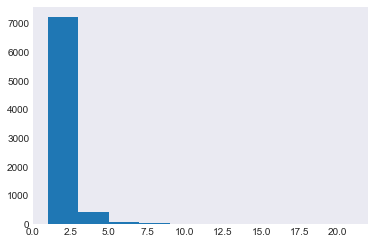

In [84]:
plt.hist(dfp["purchases_made"], bins = 10, range = (dfp["purchases_made"].min(), dfp["purchases_made"].max()))
plt.show()

We observe a similar pattern like that of "daily_iap_rev" as  this plot is Right skewed.

Let us group the customer purchase activity by Unique id

In [382]:
dfp.gb = dfp.groupby("udid")

In [384]:
dfp.longtermvalue = dfp.gb["daily_iap_rev"].sum()

In [385]:
dfp.longtermvalue.head()

udid
0020f5c05795400bb2868009cf4b2080    682.5
002b934415cb4ae78579f3be87a6283d     17.5
004f2f923b8f47a6b9f91fa5c61095de      3.5
00776d802fef4a26b525aed437af4728      3.5
008808b510244c9b957adbf27dd8c748      3.5
Name: daily_iap_rev, dtype: float64

In [387]:
dfp.firstdate_of_purchase = dfp.gb["date"].min()

In [389]:
dfp.lastdate_of_purchase = dfp.gb["date"].max()

In [390]:
dfp.lastdate_of_purchase.head()

udid
0020f5c05795400bb2868009cf4b2080   2015-08-02
002b934415cb4ae78579f3be87a6283d   2015-06-23
004f2f923b8f47a6b9f91fa5c61095de   2015-06-10
00776d802fef4a26b525aed437af4728   2015-06-06
008808b510244c9b957adbf27dd8c748   2015-06-07
Name: date, dtype: datetime64[ns]

In [391]:
dfp.firstdate_of_purchase.head()

udid
0020f5c05795400bb2868009cf4b2080   2015-06-01
002b934415cb4ae78579f3be87a6283d   2015-06-06
004f2f923b8f47a6b9f91fa5c61095de   2015-06-10
00776d802fef4a26b525aed437af4728   2015-06-06
008808b510244c9b957adbf27dd8c748   2015-06-07
Name: date, dtype: datetime64[ns]

In [393]:
dfp.purchase_duration = pd.to_datetime(dfp.lastdate_of_purchase) - pd.to_datetime(dfp.firstdate_of_purchase) 
dfp.purchase_duration.head()

udid
0020f5c05795400bb2868009cf4b2080   62 days
002b934415cb4ae78579f3be87a6283d   17 days
004f2f923b8f47a6b9f91fa5c61095de    0 days
00776d802fef4a26b525aed437af4728    0 days
008808b510244c9b957adbf27dd8c748    0 days
Name: date, dtype: timedelta64[ns]

In [395]:
dfp.total_purchases_made = dfp.gb["purchases_made"].sum()

In [396]:
type(dfp.total_purchases_made)

pandas.core.series.Series

In [397]:
df_modified_Purchases = pd.DataFrame(dfp.longtermvalue.index,                                               
                                     columns = ["udid"],
                                     index = dfp.longtermvalue.index)

In [398]:

df_modified_Purchases["firstdate_of_purchase"] = dfp.firstdate_of_purchase
df_modified_Purchases["lastdate_of_purchase"] = dfp.lastdate_of_purchase
df_modified_Purchases["purchase_duration"] = dfp.purchase_duration
df_modified_Purchases["total_purchases_made"] = dfp.total_purchases_made
df_modified_Purchases["Long term Value"] = dfp.longtermvalue




In [399]:
df_modified_Purchases["purchase_duration"] = df_modified_Purchases["purchase_duration"]

In [400]:
dfm = df_modified_Purchases.loc[:,[ "purchase_duration", "total_purchases_made","Long term Value"]]
df_modified_Purchases.head()


,udid,firstdate_of_purchase,lastdate_of_purchase,purchase_duration,total_purchases_made,Long term Value
udid,,,,,,
0020f5c05795400bb2868009cf4b2080,0020f5c05795400bb2868009cf4b2080,2015-06-01,2015-08-02,62 days,12,682.5
002b934415cb4ae78579f3be87a6283d,002b934415cb4ae78579f3be87a6283d,2015-06-06,2015-06-23,17 days,2,17.5
004f2f923b8f47a6b9f91fa5c61095de,004f2f923b8f47a6b9f91fa5c61095de,2015-06-10,2015-06-10,0 days,1,3.5
00776d802fef4a26b525aed437af4728,00776d802fef4a26b525aed437af4728,2015-06-06,2015-06-06,0 days,1,3.5
008808b510244c9b957adbf27dd8c748,008808b510244c9b957adbf27dd8c748,2015-06-07,2015-06-07,0 days,1,3.5


In [401]:
dfm.shape

(2108, 3)

In [402]:
df_modified_Purchases.to_csv("purchases_modified.csv")

In [403]:
#Converting the time into float( number of days)
string_splitter = lambda x:x/np.timedelta64(1, 'D')

dfm["purchase_duration"] = dfm["purchase_duration"].apply(string_splitter) 


In [404]:
dfm["purchase_duration"] =  dfm["purchase_duration"] +1
#Because of error correction as max date - min date +1 to get the number of days between the purchase duration

In [406]:
dfm.head()

,purchase_duration,total_purchases_made,Long term Value
udid,,,
0020f5c05795400bb2868009cf4b2080,63.0,12,682.5
002b934415cb4ae78579f3be87a6283d,18.0,2,17.5
004f2f923b8f47a6b9f91fa5c61095de,1.0,1,3.5
00776d802fef4a26b525aed437af4728,1.0,1,3.5
008808b510244c9b957adbf27dd8c748,1.0,1,3.5


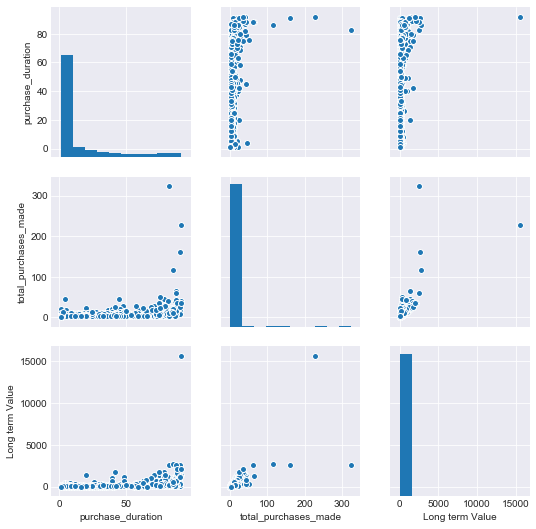

In [407]:
ax = sns.pairplot(data=dfm)
plt.show()

From the above plots we can say that all the histograms are Right skewed. So, customers duration of purchase or Longterm value or total purchases can be divided into 2 groups namely More spending customers and less spending customers. Also, there is linear relation between purchase_duration and total_purchases_made. Let's look close in to the customers Longterm value.


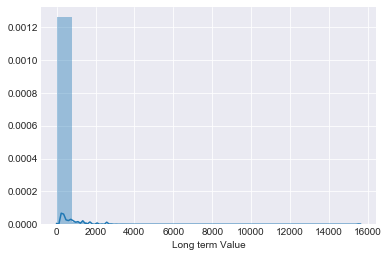

In [408]:
sns.distplot(dfm["Long term Value"],bins=20)
plt.show()

We can divide the customers at the total long term value of 750

In [410]:
dfm["Cust_Spend"] = "High"
dfm.loc[dfm["Long term Value"] < 750, "Cust_Spend"] = "Low"

In [411]:
dfm.head()

,purchase_duration,total_purchases_made,Long term Value,Cust_Spend
udid,,,,
0020f5c05795400bb2868009cf4b2080,63.0,12,682.5,Low
002b934415cb4ae78579f3be87a6283d,18.0,2,17.5,Low
004f2f923b8f47a6b9f91fa5c61095de,1.0,1,3.5,Low
00776d802fef4a26b525aed437af4728,1.0,1,3.5,Low
008808b510244c9b957adbf27dd8c748,1.0,1,3.5,Low


Also we can categorize the customers as customers who are not intersted in buying the higher cost inapp purchases by looking at total_purchases_made and Long term Value scatter plot.

As the customers whose Long term Value is more and total_purchases_made is less are not interested in buying the higher cost inapp purchases.

C:\Users\jeeva\Anaconda3\envs\py35\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


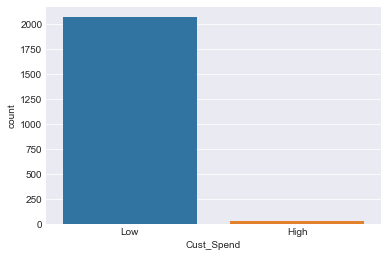

In [413]:
sns.countplot(x="Cust_Spend", data = dfm)
plt.show()

We can see that only less number of customers are spending more than 750. So, we will model them separately.

Here I can say that purchase_duration is not observation period. The observation period is calculated from the sessions file. Because an user can play the game without making a purchase. So, lets jump into the Sessions file and extract the observation period.

In [414]:
dfm["udid"] = df_modified_Purchases["udid"]
dfm.head()

,purchase_duration,total_purchases_made,Long term Value,Cust_Spend,udid
udid,,,,,
0020f5c05795400bb2868009cf4b2080,63.0,12,682.5,Low,0020f5c05795400bb2868009cf4b2080
002b934415cb4ae78579f3be87a6283d,18.0,2,17.5,Low,002b934415cb4ae78579f3be87a6283d
004f2f923b8f47a6b9f91fa5c61095de,1.0,1,3.5,Low,004f2f923b8f47a6b9f91fa5c61095de
00776d802fef4a26b525aed437af4728,1.0,1,3.5,Low,00776d802fef4a26b525aed437af4728
008808b510244c9b957adbf27dd8c748,1.0,1,3.5,Low,008808b510244c9b957adbf27dd8c748


# Sessions file

In [415]:
dfs = pd.read_csv("Sessions.csv")

In [416]:
dfs.head()

,udid,date,level_reached,sessions_played
0,d770a296cd6188e8729277645cf8e48183837135,6/1/2015,1,1
1,2e3f7322aeb54faeb8c507247c41a482,6/1/2015,1,4
2,0894b80dc99d4b09912cf9b0884201bb,6/1/2015,1,1
3,b1216a65232070a6787d0c531310148b36bf839b,6/1/2015,7,11
4,310af48b94db4d078332eb628b9578f3,6/1/2015,1,1


In [71]:
dfs.shape

(482776, 4)

In [313]:
dfs.isnull().sum()

udid               0
date               0
level_reached      0
sessions_played    0
dtype: int64

So, we do not have missing values in Sessions file

In [417]:
dfs["date"] = pd.to_datetime(dfs["date"])

In [419]:
dfs.gb = dfs.groupby("udid")

In [421]:
dfs.playing_duration = dfs.gb["date"].max() - dfs.gb["date"].min()

In [423]:
dfs.newnwss = dfs.gb["date"].min()

In [424]:
dfs.playing_duration.head()

udid
0000bdcfa90d496ea661a8d336308dbd    0 days
000223b517e041539d1a5042c81e9111    0 days
00031efa0eb841fc81f2020bfa179ace   76 days
0007d6174a744123a9b0ada408b6ffc3    0 days
000a6142899a475a95018303edef5551    0 days
Name: date, dtype: timedelta64[ns]

In [426]:
dfs.Highest_Level_reached = dfs.gb["level_reached"].max()

In [428]:
dfs.total_sessions_played = dfs.gb["sessions_played"].sum()

In [429]:
df_m_s = pd.DataFrame(dfs.total_sessions_played.index.values,                                               
                                     columns = ["udid"],
                                     index = dfs.total_sessions_played.index)

In [430]:
df_m_s.head()

,udid
udid,
0000bdcfa90d496ea661a8d336308dbd,0000bdcfa90d496ea661a8d336308dbd
000223b517e041539d1a5042c81e9111,000223b517e041539d1a5042c81e9111
00031efa0eb841fc81f2020bfa179ace,00031efa0eb841fc81f2020bfa179ace
0007d6174a744123a9b0ada408b6ffc3,0007d6174a744123a9b0ada408b6ffc3
000a6142899a475a95018303edef5551,000a6142899a475a95018303edef5551


In [431]:
df_m_s["playing_duration"] = dfs.playing_duration.values
df_m_s["total_sessions_played"] = dfs.total_sessions_played.values
df_m_s["Highest_Level_reached"] = dfs.Highest_Level_reached.values
df_m_s["Game_start_date"] = dfs.newnwss.values


In [432]:
df_m_s.head()

,udid,playing_duration,total_sessions_played,Highest_Level_reached,Game_start_date
udid,,,,,
0000bdcfa90d496ea661a8d336308dbd,0000bdcfa90d496ea661a8d336308dbd,0 days,2,1,2015-06-06
000223b517e041539d1a5042c81e9111,000223b517e041539d1a5042c81e9111,0 days,1,1,2015-06-07
00031efa0eb841fc81f2020bfa179ace,00031efa0eb841fc81f2020bfa179ace,76 days,70,12,2015-06-03
0007d6174a744123a9b0ada408b6ffc3,0007d6174a744123a9b0ada408b6ffc3,0 days,3,1,2015-06-06
000a6142899a475a95018303edef5551,000a6142899a475a95018303edef5551,0 days,2,1,2015-06-05


In [433]:
df_m_s.shape

(58831, 5)

We have customers around 58,831 active customers(who are playing the game by starting a session) out of which only 2186 have bought something. So, only less than 4% of the customers are actually buying atleast one thing in the app under the assumption that the data given tracked all the sessions and purchases of customers.

In [434]:
#Converting the time into float( number of days)
string_splitter = lambda x:x/np.timedelta64(1, 'D')

df_m_s["playing_duration"] = df_m_s["playing_duration"].apply(string_splitter)

In [435]:
dfms = df_m_s.loc[:,["playing_duration","total_sessions_played","Highest_Level_reached", "Game_start_date"]]
dfms["playing_duration"] = dfms["playing_duration"] + 1 #error correction as explained in Purchases section

In [436]:
dfms.head()

,playing_duration,total_sessions_played,Highest_Level_reached,Game_start_date
udid,,,,
0000bdcfa90d496ea661a8d336308dbd,1.0,2,1,2015-06-06
000223b517e041539d1a5042c81e9111,1.0,1,1,2015-06-07
00031efa0eb841fc81f2020bfa179ace,77.0,70,12,2015-06-03
0007d6174a744123a9b0ada408b6ffc3,1.0,3,1,2015-06-06
000a6142899a475a95018303edef5551,1.0,2,1,2015-06-05


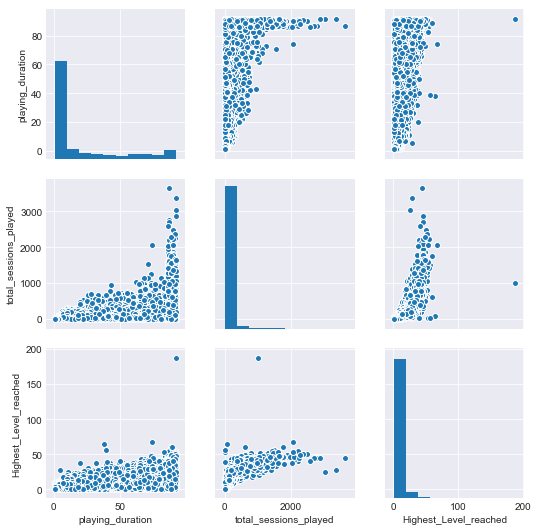

In [437]:
ax = sns.pairplot(data=dfms)
plt.show()

We can say that the playing_duration, total_sessions_played and Highest_Level_reached are Right skewed. We consider that each session time is equal as the playing_duration is giving the active number of days the customer is actually interested in playing
the game (this can be considered as "observation_period").

Let's look closer into total_sessions_played and Highest_Level_reached

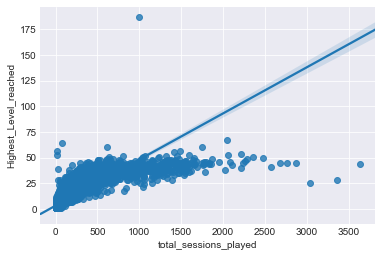

In [438]:
sns.regplot(x="total_sessions_played", y="Highest_Level_reached", data=df_m_s)
plt.show()

By this 2 way interaction plot we can classify the users as "Rookie" who are present at Right Bottom as these users played many 
sessions but did not make it to the higher levels.[total_sessions_played > 1750 and Highest_Level_reached < 50]

"Pro_Gamers" who played less sessions and made it to the higher levels [Highest_Level_reached > 25 and total_sessions_played < 250]

The rest of the users are categorized as "Normal_Gamers"

In [439]:
dfms["gamer_level"] = "Normal_Gamers"

R =  (dfms["total_sessions_played"] > 1500) & (dfms["Highest_Level_reached"] < 75)

dfms.loc[R,"gamer_level"] = "Rookie"

P =  (dfms["total_sessions_played"] < 250) & (dfms["Highest_Level_reached"] > 25)

dfms.loc[P ,"gamer_level"] = "Pro_Gamers"

dfms.head()

,playing_duration,total_sessions_played,Highest_Level_reached,Game_start_date,gamer_level
udid,,,,,
0000bdcfa90d496ea661a8d336308dbd,1.0,2,1,2015-06-06,Normal_Gamers
000223b517e041539d1a5042c81e9111,1.0,1,1,2015-06-07,Normal_Gamers
00031efa0eb841fc81f2020bfa179ace,77.0,70,12,2015-06-03,Normal_Gamers
0007d6174a744123a9b0ada408b6ffc3,1.0,3,1,2015-06-06,Normal_Gamers
000a6142899a475a95018303edef5551,1.0,2,1,2015-06-05,Normal_Gamers


C:\Users\jeeva\Anaconda3\envs\py35\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


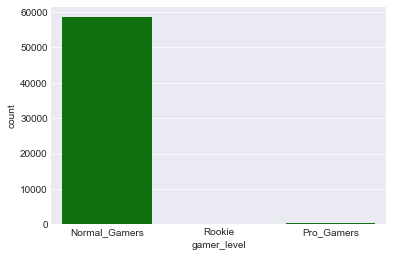

In [440]:
sns.countplot(x="gamer_level", data = dfms, color = "g")
plt.show()

In [441]:
dfms.describe()

,playing_duration,total_sessions_played,Highest_Level_reached
count,58831.000000,58831.000000,58831.000000
mean,17.721235,38.947698,5.046999
std,26.796623,127.188284,6.958439
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3.000000,4.000000,2.000000
75%,23.000000,18.000000,6.000000
max,92.000000,3634.000000,187.000000


As mean is far greater than the 50 percentile value we can say that the distribution is Right skewed.

In [442]:
pd.value_counts(dfms['gamer_level'].values, sort=False)

Normal_Gamers    58522
Pro_Gamers         250
Rookie              59
dtype: int64

In [443]:
dfms["udid"] = df_m_s["udid"]
dfms.head()

,playing_duration,total_sessions_played,Highest_Level_reached,Game_start_date,gamer_level,udid
udid,,,,,,
0000bdcfa90d496ea661a8d336308dbd,1.0,2,1,2015-06-06,Normal_Gamers,0000bdcfa90d496ea661a8d336308dbd
000223b517e041539d1a5042c81e9111,1.0,1,1,2015-06-07,Normal_Gamers,000223b517e041539d1a5042c81e9111
00031efa0eb841fc81f2020bfa179ace,77.0,70,12,2015-06-03,Normal_Gamers,00031efa0eb841fc81f2020bfa179ace
0007d6174a744123a9b0ada408b6ffc3,1.0,3,1,2015-06-06,Normal_Gamers,0007d6174a744123a9b0ada408b6ffc3
000a6142899a475a95018303edef5551,1.0,2,1,2015-06-05,Normal_Gamers,000a6142899a475a95018303edef5551


In [444]:
dfms["Game_start_date"].max()

Timestamp('2015-06-07 00:00:00')

# Users File

In [445]:
dfu = pd.read_csv("Users.csv")

In [446]:
dfu.head()

,udid,install_date,country,hw_ver
0,43109861225c4a6e7f8ddcf5cd7d830a46c1bc12,6/1/2015,VN,"iPad3,6"
1,896b5b37b0584e1ba29fb9c8a07f1a96,6/1/2015,CH,"iPad2,4"
2,85553c0a639348c89601cdd375502f16,6/1/2015,US,"iPhone3,1"
3,5385ff94fd2447dea653e16e76da3bfb,6/1/2015,SE,"iPad4,1"
4,10d3472f14af4102b09e16d5ca605533,6/1/2015,AU,"iPhone7,1"


In [447]:
dfu.shape

(58842, 4)

Around 58,842 members have installed the game in June 2015. Around 58,831 customers sessions are available with us. We can assume that we are tracking the customers effectively.

In [486]:
dfu.isnull().sum()

udid             0
install_date     0
country         54
hw_ver           0
dtype: int64

In [488]:
len(dfu["udid"].unique())

58842

So, around 58,842 users installed the game in the first week of June.We have 54 missing values of countries of Users

# Modelling

In [448]:
dfms.shape#Sessions data

(58831, 6)

In [449]:
dfm.shape#Purchases data,   around 78 people started buying the inapp purchases from September

(2108, 5)

Merging Purchases with Sessions to get new data frame

In [450]:
dft = pd.merge(dfm, dfms, on='udid', how='inner')

Merging new data frame with users dataframe to get the final dataframe

In [451]:
dft1 = pd.merge(dft,dfu, on = 'udid', how = 'inner')

In [452]:
dft1.isnull().sum()

purchase_duration        0
total_purchases_made     0
Long term Value          0
Cust_Spend               0
udid                     0
playing_duration         0
total_sessions_played    0
Highest_Level_reached    0
Game_start_date          0
gamer_level              0
install_date             0
country                  2
hw_ver                   0
dtype: int64

In [ ]:
#We only have 2 missing values of countries of our customers

In [453]:
dft1.shape

(2108, 13)

In [454]:
dft1.head()

,purchase_duration,total_purchases_made,Long term Value,Cust_Spend,udid,playing_duration,total_sessions_played,Highest_Level_reached,Game_start_date,gamer_level,install_date,country,hw_ver
0,63.0,12,682.5,Low,0020f5c05795400bb2868009cf4b2080,84.0,501,48,2015-06-01,Normal_Gamers,6/1/2015,US,"iPhone7,2"
1,18.0,2,17.5,Low,002b934415cb4ae78579f3be87a6283d,92.0,826,42,2015-06-01,Normal_Gamers,6/1/2015,US,"iPhone6,1"
2,1.0,1,3.5,Low,004f2f923b8f47a6b9f91fa5c61095de,52.0,242,30,2015-06-03,Pro_Gamers,6/3/2015,DE,"iPhone6,2"
3,1.0,1,3.5,Low,00776d802fef4a26b525aed437af4728,17.0,82,13,2015-06-06,Normal_Gamers,6/6/2015,US,"iPhone5,3"
4,1.0,1,3.5,Low,008808b510244c9b957adbf27dd8c748,11.0,7,4,2015-06-07,Normal_Gamers,6/7/2015,US,"iPhone5,3"


In [455]:
dff = dft1.loc[:,["total_sessions_played","Highest_Level_reached","purchase_duration","playing_duration",
                  "total_purchases_made", "gamer_level", "Cust_Spend","Long term Value" ]]

In [456]:
dff.head()

,total_sessions_played,Highest_Level_reached,purchase_duration,playing_duration,total_purchases_made,gamer_level,Cust_Spend,Long term Value
0,501,48,63.0,84.0,12,Normal_Gamers,Low,682.5
1,826,42,18.0,92.0,2,Normal_Gamers,Low,17.5
2,242,30,1.0,52.0,1,Pro_Gamers,Low,3.5
3,82,13,1.0,17.0,1,Normal_Gamers,Low,3.5
4,7,4,1.0,11.0,1,Normal_Gamers,Low,3.5


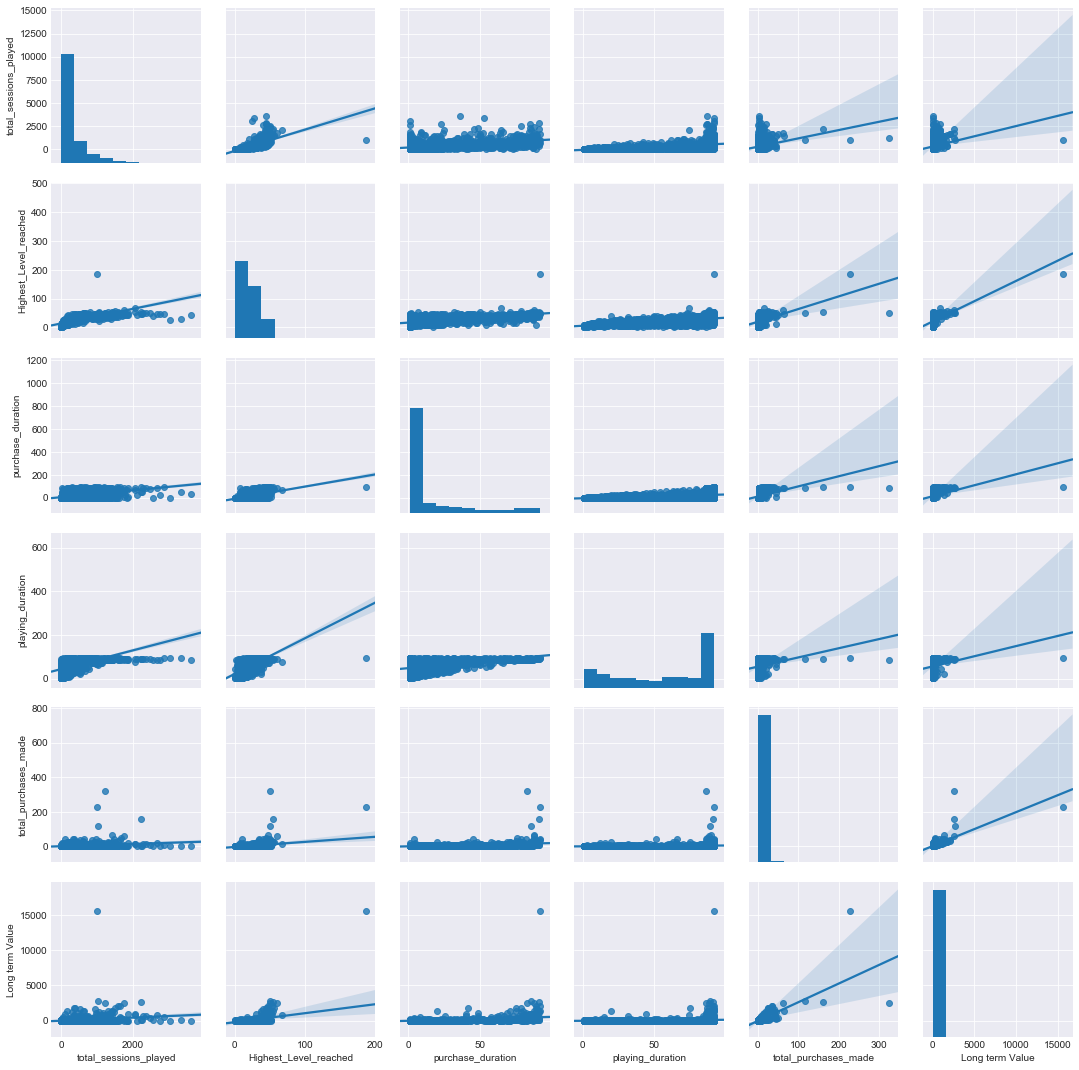

In [457]:
sns.pairplot(dff,kind="reg")
plt.show()

From the above plot we can say that the Long Term value is in Positive linear relation with all other attributes but some are strongly correlated and some are not.

In [458]:
dft1.to_csv("Modelling_Data.csv")

Here we have some categorical variables we neeed to convert them into numerical values before fitting linear regression model

In [459]:
dff1 = pd.get_dummies(dff)
dff1.head()

,total_sessions_played,Highest_Level_reached,purchase_duration,playing_duration,total_purchases_made,Long term Value,gamer_level_Normal_Gamers,gamer_level_Pro_Gamers,gamer_level_Rookie,Cust_Spend_High,Cust_Spend_Low
0,501,48,63.0,84.0,12,682.5,1,0,0,0,1
1,826,42,18.0,92.0,2,17.5,1,0,0,0,1
2,242,30,1.0,52.0,1,3.5,0,1,0,0,1
3,82,13,1.0,17.0,1,3.5,1,0,0,0,1
4,7,4,1.0,11.0,1,3.5,1,0,0,0,1


In [460]:
np.corrcoef(dff1["Long term Value"], dff1["playing_duration"])

array([[1.        , 0.11573927],
       [0.11573927, 1.        ]])

In [461]:
np.corrcoef(dff1["Long term Value"], dff1["purchase_duration"])

array([[1.        , 0.32359093],
       [0.32359093, 1.        ]])

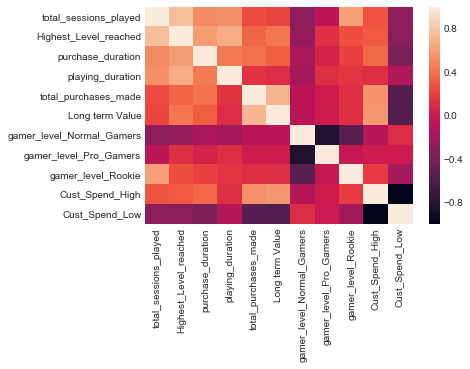

In [462]:
corr = dff1.corr(method='pearson')
sns.heatmap(corr)
plt.show()

We can keep a threshold for eliminating the redundant features for building a linear regression model

Otherwise we can go for Feature selection Backward elimination technique of Linear regression 
by keeping a threshold of confidence level to find out the most important features of this model.

In [463]:
Y = dff1["Long term Value"]
dff2 = dff1
X = dff2.drop("Long term Value",axis =1)

In [464]:
X.head()

,total_sessions_played,Highest_Level_reached,purchase_duration,playing_duration,total_purchases_made,gamer_level_Normal_Gamers,gamer_level_Pro_Gamers,gamer_level_Rookie,Cust_Spend_High,Cust_Spend_Low
0,501,48,63.0,84.0,12,1,0,0,0,1
1,826,42,18.0,92.0,2,1,0,0,0,1
2,242,30,1.0,52.0,1,0,1,0,0,1
3,82,13,1.0,17.0,1,1,0,0,0,1
4,7,4,1.0,11.0,1,1,0,0,0,1


In [465]:
Y.shape

(2108,)

In [466]:
#Scaling is important for regression as it depends upon the distance metric. Highly variable scales 
#of attributes gives erroneous reults

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)


In [467]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

Linear Regression Ordinary Least Squares model

In [468]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

171.60110307296992

Lasso Regression with penalization factor of 130(experimented with different values)

In [469]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 130)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

148.59100905739845

In [470]:
Y.min()

3.5

In [471]:
Y.max()

15624.0

We can do the cross validation and grid search for tuning the hyperparameter like alpha of Lasso for getting good accuracy. But that kind of overfit the model.

In [472]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [473]:
model = Sequential()
model.add(Dense(10, input_dim=10, activation='sigmoid'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [474]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
1405/1405 [==============================] - 12s - loss: 209194.8438    
Epoch 2/10
1405/1405 [==============================] - 0s - loss: 209119.8678     
Epoch 3/10
1405/1405 [==============================] - 0s - loss: 209040.0870     
Epoch 4/10
1405/1405 [==============================] - 0s - loss: 208967.7048     
Epoch 5/10
1405/1405 [==============================] - 0s - loss: 208900.9810     
Epoch 6/10
1405/1405 [==============================] - 0s - loss: 208846.1971     
Epoch 7/10
1405/1405 [==============================] - 0s - loss: 208797.8128     
Epoch 8/10
1405/1405 [==============================] - 0s - loss: 208751.3862      ETA: 0s - los
Epoch 9/10
1405/1405 [==============================] - 0s - loss: 208709.7461     
Epoch 10/10
1405/1405 [==============================] - 0s - loss: 208670.2130     


In [475]:
score = model.evaluate(X_test, y_test, batch_size=50)
np.sqrt(score)

550/703 [======================>.......] - ETA: 0s 

249.04426269842975

As there is less amount of data going for deep learning model is not correct

So, we need to fit different regression models for different segment (Low spending Customers and High spending customers) otherwise logarithmic model will also do a good job but things get complicated when explaining the logaritmic values.

In [477]:
l = dff["Cust_Spend"] == "Low"
h = dff["Cust_Spend"] == "High"
dffl = dff.ix[l,:] #Low spending customers in terms of purchases
dffh = dff.ix[h,:] #High spending customers in terms of purchases

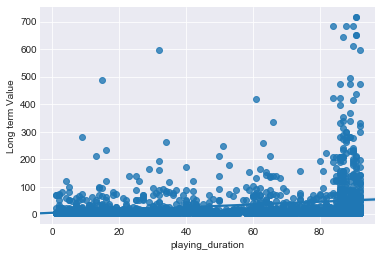

In [478]:
sns.regplot(x="playing_duration", y="Long term Value", data=dffl)
plt.show()

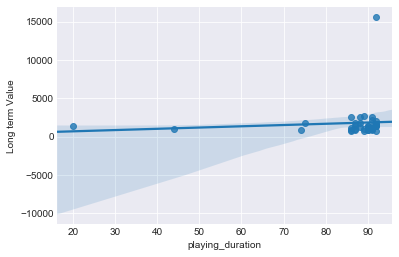

In [479]:
sns.regplot(x="playing_duration", y="Long term Value", data=dffh)
plt.show()

From the above 2 plots we can say that there is an increase in longterm value (LTV) if the observation period is increased for low end customers but for high end customers it is staying sttill.

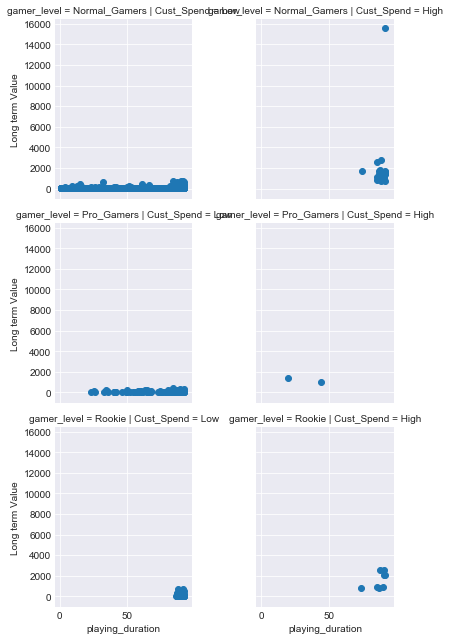

In [480]:
g = sns.FacetGrid(dff, col="Cust_Spend", row = "gamer_level")
g = g.map(plt.scatter,"playing_duration", "Long term Value")
plt.show()

In [482]:
dff1 = pd.get_dummies(dffl)
Y = dff1["Long term Value"]
dff2 = dff1
X = dff2.drop("Long term Value",axis =1)

dff1.head()
dff1["Long term Value"].max()

717.5

In [483]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 130)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

75.08370584678696

In [484]:
dff1 = pd.get_dummies(dffh)
Y = dff1["Long term Value"]
dff2 = dff1
X = dff2.drop("Long term Value",axis =1)

dff1.head()
dff1["Long term Value"].max()

15624.0

In [485]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 130)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

857.7704144968004

As expected the absolute error for a low spending customer is coming around 75(Long term Value < 700) and for high spending customers is coming around 857(1000< Long term Value < 16000)